In [ ]:
import pandas as pd
import datetime as dt

# Load data kaggle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Vinix_AQI/ispu_dki_all.csv")
df.head()

,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),NaN,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),NaN,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),NaN,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),NaN,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),NaN,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   5538 non-null   object 
 1   stasiun   5537 non-null   object 
 2   pm25      1516 non-null   float64
 3   pm10      5223 non-null   float64
 4   so2       5408 non-null   float64
 5   co        5450 non-null   float64
 6   o3        5434 non-null   float64
 7   no2       5432 non-null   float64
 8   max       5537 non-null   float64
 9   critical  5534 non-null   object 
 10  categori  5538 non-null   object 
dtypes: float64(7), object(4)
memory usage: 476.1+ KB


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   5538 non-null   datetime64[ns]
 1   stasiun   5537 non-null   object        
 2   pm25      1516 non-null   float64       
 3   pm10      5223 non-null   float64       
 4   so2       5408 non-null   float64       
 5   co        5450 non-null   float64       
 6   o3        5434 non-null   float64       
 7   no2       5432 non-null   float64       
 8   max       5537 non-null   float64       
 9   critical  5534 non-null   object        
 10  categori  5538 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 476.1+ KB


In [ ]:
df.isnull().sum()

,0
tanggal,0
stasiun,1
pm25,4022
pm10,315
so2,130
co,88
o3,104
no2,106
max,1
critical,4


# Load Data

In [ ]:
import pandas as pd
import glob

folder_path = "/content/drive/MyDrive/Vinix_AQI/ISPU/*.xlsx"

column_mapping = {
    "periode_data": ["periode_data", "tahun", "year"],
    "bulan": ["bulan", "month"],
    "tanggal_num": ["tanggal"],  # sementara untuk numeric date
    "stasiun": ["stasiun", "lokasi_spku", "lokasi", "alamat"],
    "pm10": ["pm10", "pm_sepuluh"],
    "pm2_5": ["pm2.5", "pm25", "pm_duakomalima"],
    "so2": ["so2", "sulfur_dioksida"],
    "co": ["co", "karbon_monoksida"],
    "o3": ["o3", "ozon"],
    "no2": ["no2", "nitrogen_dioksida"],
}

def normalize_columns(df):
    new_cols = {}
    for final, variants in column_mapping.items():
        for v in variants:
            matches = [c for c in df.columns if c.lower() == v.lower()]
            if matches:
                new_cols[matches[0]] = final
                break

    df = df.rename(columns=new_cols)

    # Pastikan semua kolom ada (meskipun None)
    for c in column_mapping.keys():
        if c not in df.columns:
            df[c] = None

    return df


def build_date_column(df):
    """
    Membangun kolom tanggal final dari:
    - periode_data (tahun)
    - bulan
    - tanggal_num
    Atau memakai df["tanggal"] langsung jika sudah date-like.
    """

    # Jika sudah berbentuk datetime → langsung lolos
    try:
        if pd.to_datetime(df["tanggal"], errors="coerce").notna().sum() > 0:
            df["tanggal"] = pd.to_datetime(df["tanggal"], errors="coerce")
            return df
    except:
        pass

    # Convert komponen tanggal
    df["periode_data"] = df["periode_data"].astype(str)
    df["bulan"] = df["bulan"].astype(str)
    df["tanggal_num"] = df["tanggal_num"].astype(str)

    # bentuk gabungan YYYY-MM-DD
    df["tanggal"] = pd.to_datetime(
        df["periode_data"] + "-" + df["bulan"] + "-" + df["tanggal_num"],
        errors="coerce"
    )

    return df


dfs = []
for f in glob.glob(folder_path):
    print("Processing:", f)
    df = pd.read_excel(f)

    df = normalize_columns(df)
    df = build_date_column(df)

    df = df[["tanggal", "stasiun", "pm10", "pm2_5", "so2", "co", "o3", "no2"]]
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)

merged.to_csv("/content/merged_ispu_final.csv", index=False)
merged.head()


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2010-(1765160139563).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2011-(1765160430614).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2012-(1765160448597).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2013-(1765160465689).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2014-(1765160487060).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2015-(1765160509172).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2016-(1765161057431).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2017-(1765161082395).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/stasiun-pemantau-kualitas-udara-(-spku)-tahun-2018-(1765161150346).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2019-(1765161168868).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2020-(1765161187969).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2021-(1765161203637).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(
/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2022-(1765161219356).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-2023-(1765161230163).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1765161245708).xlsx


/tmp/ipython-input-652644942.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(


,tanggal,stasiun,pm10,pm2_5,so2,co,o3,no2
0,NaT,DKI2 (Kelapa Gading),---,None,---,---,---,---
1,NaT,DKI2 (Kelapa Gading),---,None,---,---,---,---
2,NaT,DKI2 (Kelapa Gading),---,None,---,---,---,---
3,NaT,DKI2 (Kelapa Gading),---,None,---,---,---,---
4,NaT,DKI2 (Kelapa Gading),---,None,---,---,---,---


In [ ]:
import pandas as pd
import glob

# SESUAIKAN dengan folder tempat file Excel kamu disimpan
folder_path = "/content/drive/MyDrive/Vinix_AQI/ISPU/*.xlsx"

def load_and_standardize(path):
    print("Processing:", path)
    df = pd.read_excel(path)

    # --- 1) Satukan nama stasiun / lokasi ---
    if "stasiun" not in df.columns and "lokasi_spku" in df.columns:
        df["stasiun"] = df["lokasi_spku"]

    # --- 2) Satukan nama kolom polutan ---
    rename_cols = {
        "pm_sepuluh": "pm10",
        "pm_duakomalima": "pm2_5",
        "pm2.5": "pm2_5",
        "pm25": "pm2_5",
        "sulfur_dioksida": "so2",
        "karbon_monoksida": "co",
        "ozon": "o3",
        "nitrogen_dioksida": "no2",
    }
    df = df.rename(columns=rename_cols)

    # --- 3) Bangun kolom tanggal ---

    # CASE A: file DKI Jakarta -> ada kolom 'bulan' & 'tanggal' = angka hari
    if "bulan" in df.columns and "tanggal" in df.columns:
        # periode_data: 202401 → ambil 4 digit pertama sebagai tahun (2024)
        year = df["periode_data"].astype(str).str.slice(0, 4)
        month = df["bulan"].astype(str)
        day = df["tanggal"].astype(str)

        df["tanggal"] = pd.to_datetime(
            year + "-" + month + "-" + day,
            errors="coerce"
        )

    # CASE B: file lain -> tanggal sudah bentuk "YYYY-MM-DD"
    elif "tanggal" in df.columns:
        df["tanggal"] = pd.to_datetime(df["tanggal"], errors="coerce")
    else:
        df["tanggal"] = pd.NaT

    # --- 4) Pastikan semua kolom target ada ---
    target_cols = ["tanggal", "stasiun", "pm10", "pm2_5", "so2", "co", "o3", "no2"]
    for c in target_cols:
        if c not in df.columns:
            df[c] = pd.NA

    # keep hanya kolom yang dipakai
    return df[target_cols]


# === Load semua file dan gabungkan ===
dfs = []
for f in glob.glob(folder_path):
    dfs.append(load_and_standardize(f))

merged = pd.concat(dfs, ignore_index=True)

print(merged.info())
print(merged.head())

# Simpan
merged.to_csv("/content/merged_ispu_final.csv", index=False)


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2010-(1765160139563).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2011-(1765160430614).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2012-(1765160448597).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2013-(1765160465689).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2014-(1765160487060).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2015-(1765160509172).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2016-(1765161057431).xlsx
Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/indeks-standar-pencemaran-udara-(ispu)-tahun-2017-(1765161082395).xlsx
Processing: /content/drive/MyDri

/tmp/ipython-input-3775245904.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tanggal"] = pd.to_datetime(df["tanggal"], errors="coerce")


Processing: /content/drive/MyDrive/Vinix_AQI/ISPU/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1765161245708).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  18255 non-null  datetime64[ns]
 1   stasiun  18363 non-null  object        
 2   pm10     17781 non-null  object        
 3   pm2_5    7091 non-null   object        
 4   so2      18309 non-null  object        
 5   co       18316 non-null  object        
 6   o3       18319 non-null  object        
 7   no2      18296 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.1+ MB
None
     tanggal               stasiun pm10 pm2_5  so2   co   o3  no2
0 2010-01-19  DKI2 (Kelapa Gading)  ---   NaN  ---  ---  ---  ---
1 2010-01-20  DKI2 (Kelapa Gading)  ---   NaN  ---  ---  ---  ---
2 2010-01-21  DKI2 (Kelapa Gading)  ---   N

In [ ]:
# List kolom polutan yang harus menjadi angka
pollutants = ["pm10", "pm2_5", "so2", "co", "o3", "no2"]

# Bersihkan nilai seperti '---', '--', '.', '' supaya jadi NaN
for col in pollutants:
    merged[col] = merged[col].replace(["---", "--", "-", "", ".", " "], pd.NA)
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

print(merged.info())
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  18255 non-null  datetime64[ns]
 1   stasiun  18363 non-null  object        
 2   pm10     15742 non-null  float64       
 3   pm2_5    6758 non-null   float64       
 4   so2      16524 non-null  float64       
 5   co       16630 non-null  float64       
 6   o3       16470 non-null  float64       
 7   no2      16482 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB
None


,tanggal,stasiun,pm10,pm2_5,so2,co,o3,no2
0,2010-01-19,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-20,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-21,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-22,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-23,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged.tail(20)

,tanggal,stasiun,pm10,pm2_5,so2,co,o3,no2
18343,2025-09-03,DKI5 Kebon Jeruk,50.0,79.0,32.0,8.0,19.0,35.0
18344,2025-09-04,DKI5 Kebon Jeruk,42.0,69.0,30.0,6.0,23.0,26.0
18345,2025-09-05,DKI5 Kebon Jeruk,56.0,84.0,28.0,9.0,24.0,36.0
18346,2025-09-06,DKI5 Kebon Jeruk,51.0,82.0,27.0,8.0,33.0,26.0
18347,2025-09-07,DKI5 Kebon Jeruk,46.0,79.0,24.0,8.0,30.0,26.0
18348,2025-09-08,DKI5 Kebon Jeruk,55.0,102.0,27.0,16.0,25.0,50.0
18349,2025-09-09,DKI5 Kebon Jeruk,60.0,87.0,25.0,10.0,23.0,38.0
18350,2025-09-10,DKI5 Kebon Jeruk,60.0,NaN,26.0,18.0,25.0,55.0
18351,2025-09-11,DKI5 Kebon Jeruk,50.0,75.0,25.0,10.0,23.0,37.0
18352,2025-09-12,DKI5 Kebon Jeruk,25.0,67.0,25.0,7.0,21.0,28.0


In [ ]:
# kolom polutan
pollutants = ["pm10", "pm2_5", "so2", "co", "o3", "no2"]

# groupby tanggal dan ambil nilai maksimum untuk tiap polutan
daily_max = (
    merged.groupby("tanggal")[pollutants]
          .max()
          .reset_index()
)

daily_max.info()
daily_max.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  5609 non-null   datetime64[ns]
 1   pm10     5283 non-null   float64       
 2   pm2_5    1702 non-null   float64       
 3   so2      5574 non-null   float64       
 4   co       5600 non-null   float64       
 5   o3       5593 non-null   float64       
 6   no2      5601 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 306.9 KB


,tanggal,pm10,pm2_5,so2,co,o3,no2
0,2010-01-01,60.0,NaN,4.0,73.0,27.0,14.0
1,2010-01-02,32.0,NaN,2.0,16.0,33.0,9.0
2,2010-01-03,27.0,NaN,2.0,19.0,20.0,9.0
3,2010-01-04,22.0,NaN,2.0,16.0,15.0,6.0
4,2010-01-05,25.0,NaN,2.0,17.0,15.0,8.0


In [ ]:
merged[pollutants].describe()

,pm10,pm2_5,so2,co,o3,no2
count,15742.000000,6758.000000,16524.000000,16630.000000,16470.000000,16482.000000
mean,53.591920,76.014501,27.240257,19.896272,54.096357,16.610788
std,18.829368,23.975428,15.322410,11.934242,40.218821,11.702831
min,2.000000,10.000000,0.000000,0.000000,2.000000,0.000000
25%,42.000000,60.000000,15.000000,11.000000,25.000000,9.000000
50%,55.000000,77.000000,25.000000,17.000000,43.000000,14.000000
75%,65.000000,91.000000,37.000000,26.000000,73.000000,21.000000
max,187.000000,287.000000,112.000000,134.000000,314.000000,202.000000


In [ ]:
df = df.rename(columns={"pm2_5": "pm25"})

In [ ]:
cols = ["tanggal", "pm10", "pm25", "so2", "co", "o3", "no2"]

daily_max = daily_max[cols]
df = df[cols]

In [ ]:
pollutants = ["pm10", "pm25", "so2", "co", "o3", "no2"]

df["tanggal"] = pd.to_datetime(df["tanggal"])
daily_max["tanggal"] = pd.to_datetime(daily_max["tanggal"])

In [ ]:
df = df.dropna(subset=["tanggal"])

In [ ]:
df["tanggal"] = pd.to_datetime(df["tanggal"], errors="coerce")

In [ ]:
df["tanggal"].isna().sum()

np.int64(0)

In [ ]:
df['tanggal'].head()

,tanggal
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


In [ ]:
print(df["tanggal"].min(), df["tanggal"].max())
print(daily_max["tanggal"].min(), daily_max["tanggal"].max())

2010-01-01 00:00:00 2025-02-28 00:00:00
2010-01-01 00:00:00 2025-09-30 00:00:00


In [ ]:
df["tanggal"].isna().sum(), daily_max["tanggal"].isna().sum()

(np.int64(3196), np.int64(0))

In [ ]:
start_date = min(df["tanggal"].min(), daily_max["tanggal"].min())
end_date   = max(df["tanggal"].max(), daily_max["tanggal"].max())

all_dates = pd.date_range(start_date, end_date, freq="D")
master = pd.DataFrame({"tanggal": all_dates})

In [ ]:
df_src = df[["tanggal"] + pollutants].rename(
    columns={c: c + "_df" for c in pollutants}
)

dm_src = daily_max[["tanggal"] + pollutants].rename(
    columns={c: c + "_dm" for c in pollutants}
)

tmp = (
    master
    .merge(df_src, on="tanggal", how="left")
    .merge(dm_src, on="tanggal", how="left")
)

In [ ]:
df_final = master.copy()

for p in pollutants:
    col_df = p + "_df"
    col_dm = p + "_dm"
    df_final[p] = tmp[col_df].combine_first(tmp[col_dm])

In [ ]:
df_final.info()
df_final["tanggal"].min(), df_final["tanggal"].max()
df_final["tanggal"].isna().sum()      # harus 0
df_final["year"] = df_final["tanggal"].dt.year
df_final["year"].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  5752 non-null   datetime64[ns]
 1   pm10     5741 non-null   float64       
 2   pm25     1761 non-null   float64       
 3   so2      5719 non-null   float64       
 4   co       5745 non-null   float64       
 5   o3       5735 non-null   float64       
 6   no2      5744 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 314.7 KB


,count
year,
2010,365
2011,365
2012,366
2013,365
2014,365
2015,365
2016,366
2017,365
2018,365


In [ ]:
df_fill = df_final.copy()
df_fill.set_index('tanggal', inplace=True)
cols_fill = ['pm10', 'so2', 'co', 'o3', 'no2']
df_fill[cols_fill] = df_fill[cols_fill].interpolate(method='time')

In [ ]:
df_final.tail()

,tanggal,pm10,pm25,so2,co,o3,no2,year
5747,2025-09-26,66.0,91.0,55.0,16.0,45.0,43.0,2025
5748,2025-09-27,60.0,86.0,57.0,18.0,36.0,51.0,2025
5749,2025-09-28,61.0,80.0,56.0,13.0,29.0,54.0,2025
5750,2025-09-29,74.0,96.0,57.0,17.0,28.0,65.0,2025
5751,2025-09-30,55.0,91.0,56.0,31.0,15.0,79.0,2025


In [ ]:
df_pred = df_fill[df_fill.index >= "2021-02-01"].copy()

In [ ]:
df_pred = df_pred.sort_index()

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1703 entries, 2021-02-01 to 2025-09-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    1703 non-null   float64
 1   pm25    1702 non-null   float64
 2   so2     1703 non-null   float64
 3   co      1703 non-null   float64
 4   o3      1703 non-null   float64
 5   no2     1703 non-null   float64
 6   year    1703 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 99.8 KB


In [ ]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5752 entries, 2010-01-01 to 2025-09-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    5752 non-null   float64
 1   pm25    1761 non-null   float64
 2   so2     5752 non-null   float64
 3   co      5752 non-null   float64
 4   o3      5752 non-null   float64
 5   no2     5752 non-null   float64
 6   year    5752 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 337.0 KB


In [ ]:
output_path_df_fill = '/content/drive/MyDrive/Vinix_AQI/df_fill_cleaned.csv'
df_fill.to_csv(output_path_df_fill, index=True)

In [ ]:
import glob
import os
import pandas as pd
from google.colab import drive

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

base_path = "/content/drive/MyDrive/Vinix_AQI/Data Iklim"
list_df = []

for tahun in range(2010, 2026):
    path_pencarian = os.path.join(base_path, str(tahun), "*.xlsx")
    files = glob.glob(path_pencarian)

    for f in files:
        try:
            df_temp = pd.read_excel(
                f,
                header=7,
                decimal=',',
                na_values=['-', 'None', 'nan', '8888', '9999']
            )

            df_temp = df_temp.dropna(subset=['TANGGAL'])

            df_temp['TANGGAL'] = pd.to_datetime(df_temp['TANGGAL'], format='%d-%m-%Y', errors='coerce')
            df_temp = df_temp.dropna(subset=['TANGGAL'])

            list_df.append(df_temp)

        except Exception as e:
            print(f"Skip file error: {f} | {e}")

    df_final = pd.concat(list_df, ignore_index=True)

    df_final = df_final.sort_values(by='TANGGAL')
    df_final.set_index('TANGGAL', inplace=True)

print(df_final.tail())

              TN    TX  TAVG  RH_AVG   RR   SS  FF_X  DDD_X  FF_AVG DDD_CAR
TANGGAL                                                                    
2025-09-26  27.0  35.0  30.2    68.0  0.0  6.5   4.0   50.0     1.0       C
2025-09-27  27.6  34.4  30.3    69.0  0.0  7.6   5.0  130.0     2.0       E
2025-09-28  27.8  34.6  30.5    67.0  0.0  8.0   5.0  330.0     2.0       C
2025-09-29  27.4  33.4  28.1    78.0  0.0  8.0   2.0  300.0     1.0       C
2025-09-30  25.4  32.8  28.3    74.0  8.1  1.7   4.0   60.0     1.0       C


In [ ]:
df_final.duplicated().sum()

np.int64(46)

In [ ]:
df_final = df_final[~df_final.index.duplicated(keep='first')]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5750 entries, 2010-01-01 to 2025-09-30
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TN       5630 non-null   float64
 1   TX       5706 non-null   float64
 2   TAVG     5726 non-null   float64
 3   RH_AVG   5735 non-null   float64
 4   RR       4964 non-null   float64
 5   SS       5612 non-null   float64
 6   FF_X     5750 non-null   float64
 7   DDD_X    5750 non-null   float64
 8   FF_AVG   5749 non-null   float64
 9   DDD_CAR  5749 non-null   object 
dtypes: float64(9), object(1)
memory usage: 494.1+ KB


In [ ]:
target_lengkap = pd.date_range(start='2010-01-01', end='2025-09-30', freq='D')

tanggal_hilang = target_lengkap.difference(df_final.index)

print(f"Jumlah tanggal hilang: {len(tanggal_hilang)}")
for tgl in tanggal_hilang:
    print(tgl.strftime('%d %B %Y'))

Jumlah tanggal hilang: 2
05 May 2015
31 March 2024


In [ ]:
idx_lengkap = pd.date_range('2010-01-01', '2025-09-30')
df_fix = df_final.reindex(idx_lengkap)
df_fix.index.name = 'TANGGAL'

cols_numeric = df_fix.select_dtypes(include=['float64', 'int64']).columns

df_fix[cols_numeric] = df_fix[cols_numeric].interpolate(method='linear')

cols_object = df_fix.select_dtypes(include=['object']).columns

df_fix[cols_object] = df_fix[cols_object].ffill().bfill()

target_check = ['2015-05-05', '2024-03-31']
print(df_fix.loc[target_check])

              TN    TX   TAVG  RH_AVG         RR   SS  FF_X  DDD_X  FF_AVG  \
TANGGAL                                                                      
2015-05-05  25.0  33.4  28.40    77.5   8.300000  3.9   4.5  180.0     1.0   
2024-03-31  26.6  33.3  29.45    77.5  12.133333  5.1   3.5  340.0     1.0   

           DDD_CAR  
TANGGAL             
2015-05-05      N   
2024-03-31      C   


In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5752 entries, 2010-01-01 to 2025-09-30
Freq: D
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TN       5752 non-null   float64
 1   TX       5752 non-null   float64
 2   TAVG     5752 non-null   float64
 3   RH_AVG   5752 non-null   float64
 4   RR       5752 non-null   float64
 5   SS       5752 non-null   float64
 6   FF_X     5752 non-null   float64
 7   DDD_X    5752 non-null   float64
 8   FF_AVG   5752 non-null   float64
 9   DDD_CAR  5752 non-null   object 
dtypes: float64(9), object(1)
memory usage: 623.4+ KB


In [ ]:
df_fix.isnull().sum()

,0
TN,0
TX,0
TAVG,0
RH_AVG,0
RR,0
SS,0
FF_X,0
DDD_X,0
FF_AVG,0
DDD_CAR,0


In [ ]:
df_fix.head(22)

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
TANGGAL,,,,,,,,,,
2010-01-01,26.0,32.4,28.7,75.0,0.00,2.9,4.0,225.0,4.0,W
2010-01-02,25.0,33.8,28.7,73.0,6.60,5.5,5.0,270.0,2.0,NW
2010-01-03,26.0,33.8,28.8,72.0,0.00,2.7,4.0,225.0,3.0,NE
2010-01-04,25.0,33.4,29.9,70.0,0.00,7.7,6.0,270.0,2.0,SE
2010-01-05,24.0,33.0,28.5,70.0,0.40,0.5,5.0,180.0,3.0,E
2010-01-06,26.0,33.2,28.6,74.0,0.00,3.7,5.0,180.0,3.0,NE
2010-01-07,25.0,33.0,28.1,76.0,12.70,4.3,6.0,180.0,3.0,NE
2010-01-08,25.0,28.7,26.9,85.0,0.50,0.0,5.0,135.0,2.0,N
2010-01-09,24.0,30.0,27.4,80.0,28.00,0.2,5.0,180.0,3.0,NW


In [ ]:
output_path = '/content/drive/MyDrive/Vinix_AQI/df_final_cleaned.csv'
df_final.to_csv(output_path, index=True)

In [ ]:
import holidays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_features = df_fix.copy()

df_features['day_of_week'] = df_features.index.dayofweek
df_features['is_weekend'] = df_features['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

id_holidays = holidays.ID()

def check_holiday(date):
    return 1 if date in id_holidays else 0

df_features['is_holiday'] = df_features.index.to_series().apply(check_holiday)

df_features['is_off_day'] = ((df_features['is_weekend'] == 1) | (df_features['is_holiday'] == 1)).astype(int)


def get_season(month):
    if 4 <= month <= 9:
        return 0
    else:
        return 1

df_features['season'] = df_features.index.month.map(get_season)

print(df_features[['day_of_week', 'is_holiday', 'is_off_day', 'season']].head(10))

print(f"\nTotal Hari Libur Nasional (2010-2025): {df_features['is_holiday'].sum()} hari")

            day_of_week  is_holiday  is_off_day  season
TANGGAL                                                
2010-01-01            4           1           1       1
2010-01-02            5           0           1       1
2010-01-03            6           0           1       1
2010-01-04            0           0           0       1
2010-01-05            1           0           0       1
2010-01-06            2           0           0       1
2010-01-07            3           0           0       1
2010-01-08            4           0           0       1
2010-01-09            5           0           1       1
2010-01-10            6           0           1       1

Total Hari Libur Nasional (2010-2025): 256 hari


In [ ]:
df_features.head(20)

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,day_of_week,is_weekend,is_holiday,is_off_day,season
TANGGAL,,,,,,,,,,,,,,,
2010-01-01,26.0,32.4,28.7,75.0,0.0,2.9,4.0,225.0,4.0,W,4,0,1,1,1
2010-01-02,25.0,33.8,28.7,73.0,6.6,5.5,5.0,270.0,2.0,NW,5,1,0,1,1
2010-01-03,26.0,33.8,28.8,72.0,0.0,2.7,4.0,225.0,3.0,NE,6,1,0,1,1
2010-01-04,25.0,33.4,29.9,70.0,0.0,7.7,6.0,270.0,2.0,SE,0,0,0,0,1
2010-01-05,24.0,33.0,28.5,70.0,0.4,0.5,5.0,180.0,3.0,E,1,0,0,0,1
2010-01-06,26.0,33.2,28.6,74.0,0.0,3.7,5.0,180.0,3.0,NE,2,0,0,0,1
2010-01-07,25.0,33.0,28.1,76.0,12.7,4.3,6.0,180.0,3.0,NE,3,0,0,0,1
2010-01-08,25.0,28.7,26.9,85.0,0.5,0.0,5.0,135.0,2.0,N,4,0,0,0,1
2010-01-09,24.0,30.0,27.4,80.0,28.0,0.2,5.0,180.0,3.0,NW,5,1,0,1,1


--- Fitur Siap Masuk Model (5 Baris Pertama) ---
             day_sin   day_cos  month_sin  month_cos  is_holiday
TANGGAL                                                         
2010-01-01 -0.433884 -0.900969        0.5   0.866025           1
2010-01-02 -0.974928 -0.222521        0.5   0.866025           0
2010-01-03 -0.781831  0.623490        0.5   0.866025           0
2010-01-04  0.000000  1.000000        0.5   0.866025           0
2010-01-05  0.781831  0.623490        0.5   0.866025           0


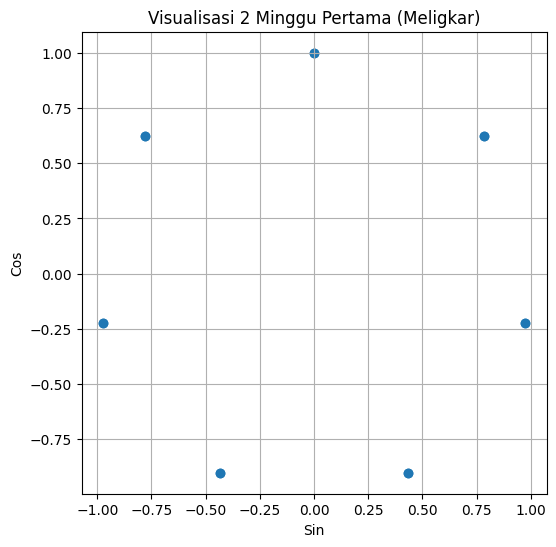

In [ ]:
df_best = df_features.copy()

df_best['day_sin'] = np.sin(2 * np.pi * df_best['day_of_week'] / 7)
df_best['day_cos'] = np.cos(2 * np.pi * df_best['day_of_week'] / 7)


df_best['month_sin'] = np.sin(2 * np.pi * df_best.index.month / 12)
df_best['month_cos'] = np.cos(2 * np.pi * df_best.index.month / 12)

cols_to_drop = ['day_of_week', 'is_weekend', 'is_off_day']
df_final_model = df_best.drop(columns=cols_to_drop)

print("--- Fitur Siap Masuk Model (5 Baris Pertama) ---")
print(df_final_model[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'is_holiday']].head())

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(df_final_model['day_sin'][:14], df_final_model['day_cos'][:14])
plt.title("Visualisasi 2 Minggu Pertama (Meligkar)")
plt.xlabel("Sin"); plt.ylabel("Cos")
plt.grid(True)
plt.show()

In [ ]:
df_best.tail()

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,day_of_week,is_weekend,is_holiday,is_off_day,season,day_sin,day_cos,month_sin,month_cos
TANGGAL,,,,,,,,,,,,,,,,,,,
2025-09-26,27.0,35.0,30.2,68.0,0.0,6.5,4.0,50.0,1.0,C,4,0,0,0,0,-0.433884,-0.900969,-1.0,-1.836970e-16
2025-09-27,27.6,34.4,30.3,69.0,0.0,7.6,5.0,130.0,2.0,E,5,1,0,1,0,-0.974928,-0.222521,-1.0,-1.836970e-16
2025-09-28,27.8,34.6,30.5,67.0,0.0,8.0,5.0,330.0,2.0,C,6,1,0,1,0,-0.781831,0.623490,-1.0,-1.836970e-16
2025-09-29,27.4,33.4,28.1,78.0,0.0,8.0,2.0,300.0,1.0,C,0,0,0,0,0,0.000000,1.000000,-1.0,-1.836970e-16
2025-09-30,25.4,32.8,28.3,74.0,8.1,1.7,4.0,60.0,1.0,C,1,0,0,0,0,0.781831,0.623490,-1.0,-1.836970e-16


In [ ]:
df_best_pred = df_best[df_best.index >= "2021-02-01"].copy()

In [ ]:
df_best_pred = df_best_pred.sort_index()

In [ ]:
df_pred.drop(columns=['year'], inplace=True)

In [ ]:
df_pred_final = pd.merge(df_pred, df_best_pred, left_index=True, right_index=True)

In [ ]:
df_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1703 entries, 2021-02-01 to 2025-09-30
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm10         1703 non-null   float64
 1   pm25         1702 non-null   float64
 2   so2          1703 non-null   float64
 3   co           1703 non-null   float64
 4   o3           1703 non-null   float64
 5   no2          1703 non-null   float64
 6   TN           1703 non-null   float64
 7   TX           1703 non-null   float64
 8   TAVG         1703 non-null   float64
 9   RH_AVG       1703 non-null   float64
 10  RR           1703 non-null   float64
 11  SS           1703 non-null   float64
 12  FF_X         1703 non-null   float64
 13  DDD_X        1703 non-null   float64
 14  FF_AVG       1703 non-null   float64
 15  DDD_CAR      1703 non-null   object 
 16  day_of_week  1703 non-null   int32  
 17  is_weekend   1703 non-null   int64  
 18  is_holiday   1703 non-null   i

In [ ]:
df_pred_final.head()

,pm10,pm25,so2,co,o3,no2,year,TN,TX,TAVG,...,DDD_CAR,day_of_week,is_weekend,is_holiday,is_off_day,season,day_sin,day_cos,month_sin,month_cos
tanggal,,,,,,,,,,,,,,,,,,,,,
2021-02-01,70.0,126.0,29.0,26.0,15.0,34.0,2021,24.8,30.4,27.1,...,C,0,0,0,0,1,0.000000,1.000000,0.866025,0.5
2021-02-02,53.0,70.0,25.0,10.0,27.0,14.0,2021,25.4,29.8,27.4,...,C,1,0,0,0,1,0.781831,0.623490,0.866025,0.5
2021-02-03,32.0,53.0,27.0,6.0,24.0,9.0,2021,24.2,29.4,26.5,...,C,2,0,0,0,1,0.974928,-0.222521,0.866025,0.5
2021-02-04,32.0,59.0,28.0,9.0,14.0,17.0,2021,24.2,29.8,26.5,...,C,3,0,0,0,1,0.433884,-0.900969,0.866025,0.5
2021-02-05,27.0,51.0,24.0,10.0,24.0,12.0,2021,25.0,29.6,27.0,...,NW,4,0,0,0,1,-0.433884,-0.900969,0.866025,0.5


In [ ]:
df_pred_final['pm25'] = df_pred_final['pm25'].interpolate(method='time')

In [ ]:
output_path = '/content/drive/MyDrive/Vinix_AQI/df_pred_final.csv'
df_pred_final.to_csv(output_path, index=True)

In [ ]:
df_fill_noy = df_fill.drop(columns=['year'])

In [ ]:
df_pred_nfinal = pd.merge(df_fill_noy, df_best, left_index=True, right_index=True)

In [ ]:
df_pred_nfinal.head()

,pm10,pm25,so2,co,o3,no2,TN,TX,TAVG,RH_AVG,...,DDD_CAR,day_of_week,is_weekend,is_holiday,is_off_day,season,day_sin,day_cos,month_sin,month_cos
tanggal,,,,,,,,,,,,,,,,,,,,,
2010-01-01,60.0,NaN,4.0,73.0,27.0,14.0,26.0,32.4,28.7,75.0,...,W,4,0,1,1,1,-0.433884,-0.900969,0.5,0.866025
2010-01-02,32.0,NaN,2.0,16.0,33.0,9.0,25.0,33.8,28.7,73.0,...,NW,5,1,0,1,1,-0.974928,-0.222521,0.5,0.866025
2010-01-03,27.0,NaN,2.0,19.0,20.0,9.0,26.0,33.8,28.8,72.0,...,NE,6,1,0,1,1,-0.781831,0.623490,0.5,0.866025
2010-01-04,22.0,NaN,2.0,16.0,15.0,6.0,25.0,33.4,29.9,70.0,...,SE,0,0,0,0,1,0.000000,1.000000,0.5,0.866025
2010-01-05,25.0,NaN,2.0,17.0,15.0,8.0,24.0,33.0,28.5,70.0,...,E,1,0,0,0,1,0.781831,0.623490,0.5,0.866025
